In [108]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Machine learning - classification presentation

In [ ]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.decomposition.pca import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 10, X[:, 0].max() + 10
    x2_min, x2_max = X[:, 1].min() - 10, X[:, 1].max() + 10
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)


In [95]:
# scaler definition
sc = StandardScaler() 
# Principal Component Analysis object, useful in feature dimension reduction
pca = PCA(n_components=2) 
# examplary data import
data = load_iris() 
# feature and terget extraction
X = data['data']
y = data['target']
# standardized features
X_std = sc.fit_transform(X)
# standardized features after dimension reduction
X_std_pc = pca.fit_transform(X_std)
X_train,X_test,y_train,y_test =  train_test_split(X_std_pc,y, train_size=0.7)

# Introduction
The presentation visualizes basic concepts of data classification. It is based on scikit-learn module. Classified data comes from Iris Database, which contains information about 150 flowers. Each of them belongs to one of 3 types: 'setosa', 'versicolor', 'virginica'. There are four parameters that characterize each specimen: 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'. The tast is to create algorithm that will predict flower type based on four features which may be treated as input to the classifier.

Below are shown two tables. First one with 5 first elements of database without flower types. Second contains random sample of 10 elements with added type column.

In [109]:
#print(data.keys())
#print(data['feature_names'])
#print(data['target_names'])
#print(len(X))
import pandas as pd
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [110]:
m1 = [data['target_names'][k] for k in data['target']]
df['type'] = m1
df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
24,4.8,3.4,1.9,0.2,setosa
128,6.4,2.8,5.6,2.1,virginica
3,4.6,3.1,1.5,0.2,setosa
73,6.1,2.8,4.7,1.2,versicolor
103,6.3,2.9,5.6,1.8,virginica
59,5.2,2.7,3.9,1.4,versicolor
116,6.5,3.0,5.5,1.8,virginica
111,6.4,2.7,5.3,1.9,virginica
127,6.1,3.0,4.9,1.8,virginica
42,4.4,3.2,1.3,0.2,setosa


# Dimension Reduction
Dimension reduction of feature space causes loss of information, but also accelerates computation. In order to visualize classification reduction to 2d feature space was performed. The method chosen was PCA - Principal Component Analysis. The method reduces dimensionality by rejection of correlated features or their combinations and leaving only uncorelated principal components.

# SVM
SVM - Support Vector Machine is a classifier that separates data by dividing feature space with multidimensional hyperplanes. For 2d feature space dividing hyperplane would be a line. For 3d feature space plane. The concept can be generalized to n dimensions.

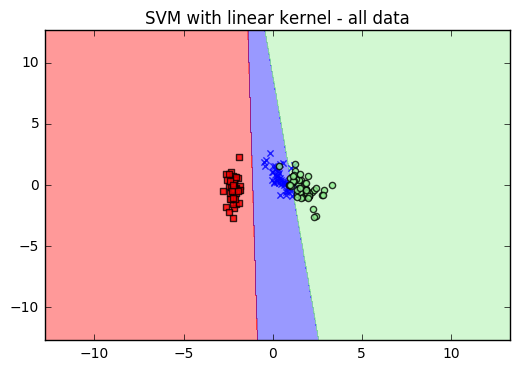

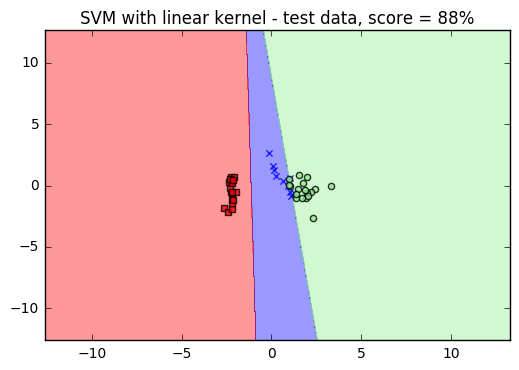

In [111]:
# Support Vector Machine Classifier
clf = SVC(degree=2,kernel='linear')
clf.fit(X_train,y_train)
svm_lin = clf

plot_decision_regions(X_std_pc,y,clf)
plt.title("SVM with linear kernel - all data")
plt.show()

svm_lin_score = int(svm_lin.score(X_test,y_test)*100)
plot_decision_regions(X_test,y_test,clf)
plt.title("SVM with linear kernel - test data, "+"score = "+str(svm_lin_score)+"%" )
plt.show()

# SVM and kernels
Kernels allow for generalization of support vector machines for use on data that is not linearly separable.
Kernel trick is operation which enables algorithm to map feature space X to some other space Y with more dimensions without explicitly performing this operation. If you map your features to higher dimension it may become linearly separable and algorithm will classify with high accuracy.


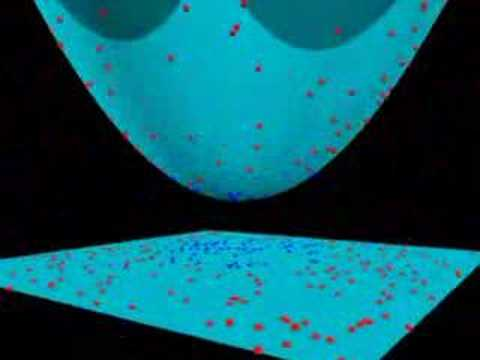

In [99]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('3liCbRZPrZA')

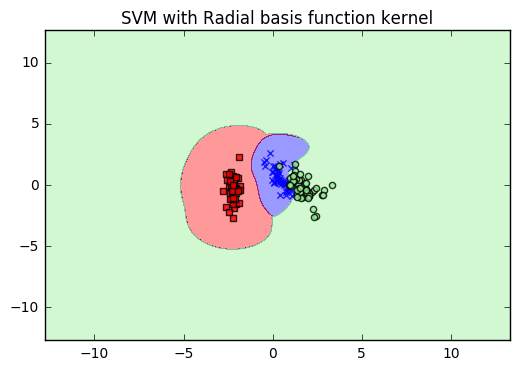

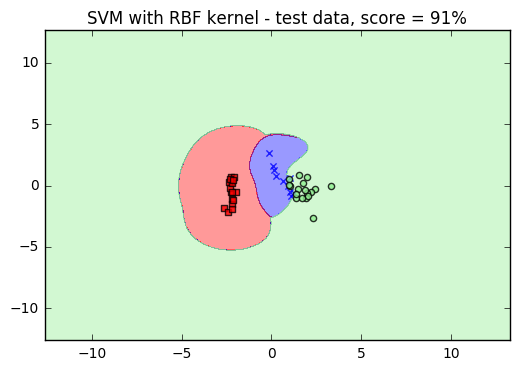

In [100]:

# Support Vector Machine Classifier
clf = SVC(degree=2,kernel='rbf')
clf.fit(X_train,y_train)
svm_ker = clf

plot_decision_regions(X_std_pc,y,clf)
plt.title("SVM with Radial basis function kernel")
plt.show()

svm_ker_score = int(clf.score(X_test,y_test)*100)
plot_decision_regions(X_test,y_test,clf)
plt.title("SVM with RBF kernel - test data, "+"score = "+str(svm_ker_score)+"%")
plt.show()

# K-nearest neighbours
Classifier calculates distance to each member of dataset. Chooses k nearest elements and is classified in result of voting. For example it is classified as 'setosa' if most of its k nearest neighbours is of setosa type.

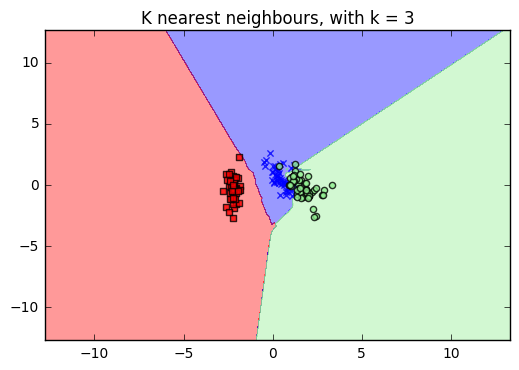

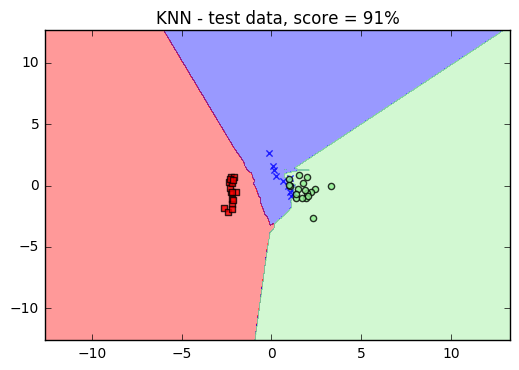

In [101]:
n = 3
clf = KNeighborsClassifier(n_neighbors=n,algorithm='brute')
clf.fit(X_train,y_train)
knear = clf

plot_decision_regions(X_std_pc,y,clf)
plt.title("K nearest neighbours, with k = "+str(n))
plt.show()

knear_score = int(clf.score(X_test,y_test)*100)

plot_decision_regions(X_test,y_test,clf)
plt.title("KNN - test data, "+"score = "+str(knear_score)+"%")
plt.show()

# Summary
All clasifiers divided feature space in 3 areas. Classification is performed by calculating to which area the sample belongs. For each algorithm approximately 90% accuracy was achieved.